In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import umap
from scipy import stats
from sklearn.decomposition import PCA
import joblib

In [2]:
df = pd.read_pickle('pivot_table_rdm42.pkl')

In [3]:
drop_cols = ['Age', 'Sex', 'Race', 'Death_Status','#diagnosis','isAD']
X = df.drop(drop_cols, axis=1) 

In [4]:
pca = joblib.load('pca1000_model_rdm42.joblib')
data_pca = np.load('data_pca1000_rdm42.npy')

In [5]:
# Get principal component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [6]:
# Convert to the data frame
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=X.columns)
print(loadings_df)

                                                         PC1       PC2  \
"walking corpse" syndrome                           0.000200 -0.000050   
'light-for-dates' infant with signs of fetal ma...  0.000127  0.000367   
(HFpEF) heart failure with preserved ejection f...  0.008592  0.007759   
(Idiopathic) normal pressure hydrocephalus (HCC)    0.001447  0.003203   
1st MTP arthritis                                   0.000262  0.000023   
...                                                      ...       ...   
Zygoma fracture, closed, initial encounter          0.000527  0.000050   
Zygomatic arch fracture, closed, initial encounter  0.000210  0.000446   
Zygomatic fracture, closed, initial encounter       0.000210  0.000446   
Zygomatic fracture, right side, subsequent enco...  0.000193  0.000264   
Zygomatic fracture, unspecified side, initial e...  0.001156  0.001550   

                                                         PC3       PC4  \
"walking corpse" syndrome            

In [7]:
# Save the pca lodings to csv file
loadings_df.to_csv('PCA_loadings.csv', index=True)

In [8]:
#　Calculate　the explained variance ratio of the principal components"
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance_ratio}')

Explained variance ratio: [0.06270587 0.02465411 0.01165551 0.00869454 0.00704487 0.00564142
 0.00528974 0.00492263 0.00459715 0.00435383 0.00409089 0.00382065
 0.00364481 0.00359494 0.00348207 0.00345419 0.00338438 0.00329502
 0.00310236 0.00297453 0.00293655 0.00285133 0.00281391 0.00278435
 0.00271496 0.00266545 0.00263089 0.00253105 0.00251105 0.00244836
 0.00243965 0.00239674 0.00237778 0.00232245 0.002285   0.00226474
 0.00223083 0.00220852 0.00218654 0.00215845 0.0021279  0.00211131
 0.00209337 0.00206257 0.00203984 0.00200478 0.00196688 0.00195506
 0.00193072 0.00192288 0.00192093 0.00189467 0.0018812  0.00185936
 0.00182484 0.00182026 0.00181385 0.00179981 0.00177631 0.00176024
 0.00175617 0.00174069 0.00172684 0.00171841 0.00169953 0.0016918
 0.00168814 0.00166626 0.00166006 0.00165448 0.00163843 0.00163582
 0.0016164  0.00160165 0.00159981 0.0015897  0.00157037 0.00156654
 0.00155112 0.00153449 0.00152885 0.00152592 0.00150468 0.00150429
 0.00149399 0.00148444 0.00147535 0.0

In [9]:
# Convert to the data frame
df = pd.DataFrame(explained_variance_ratio, columns=['Explained Variance Ratio'])
# Save as a csv file
df.to_csv('PCA_explained_variance_ratio.csv', index=False)

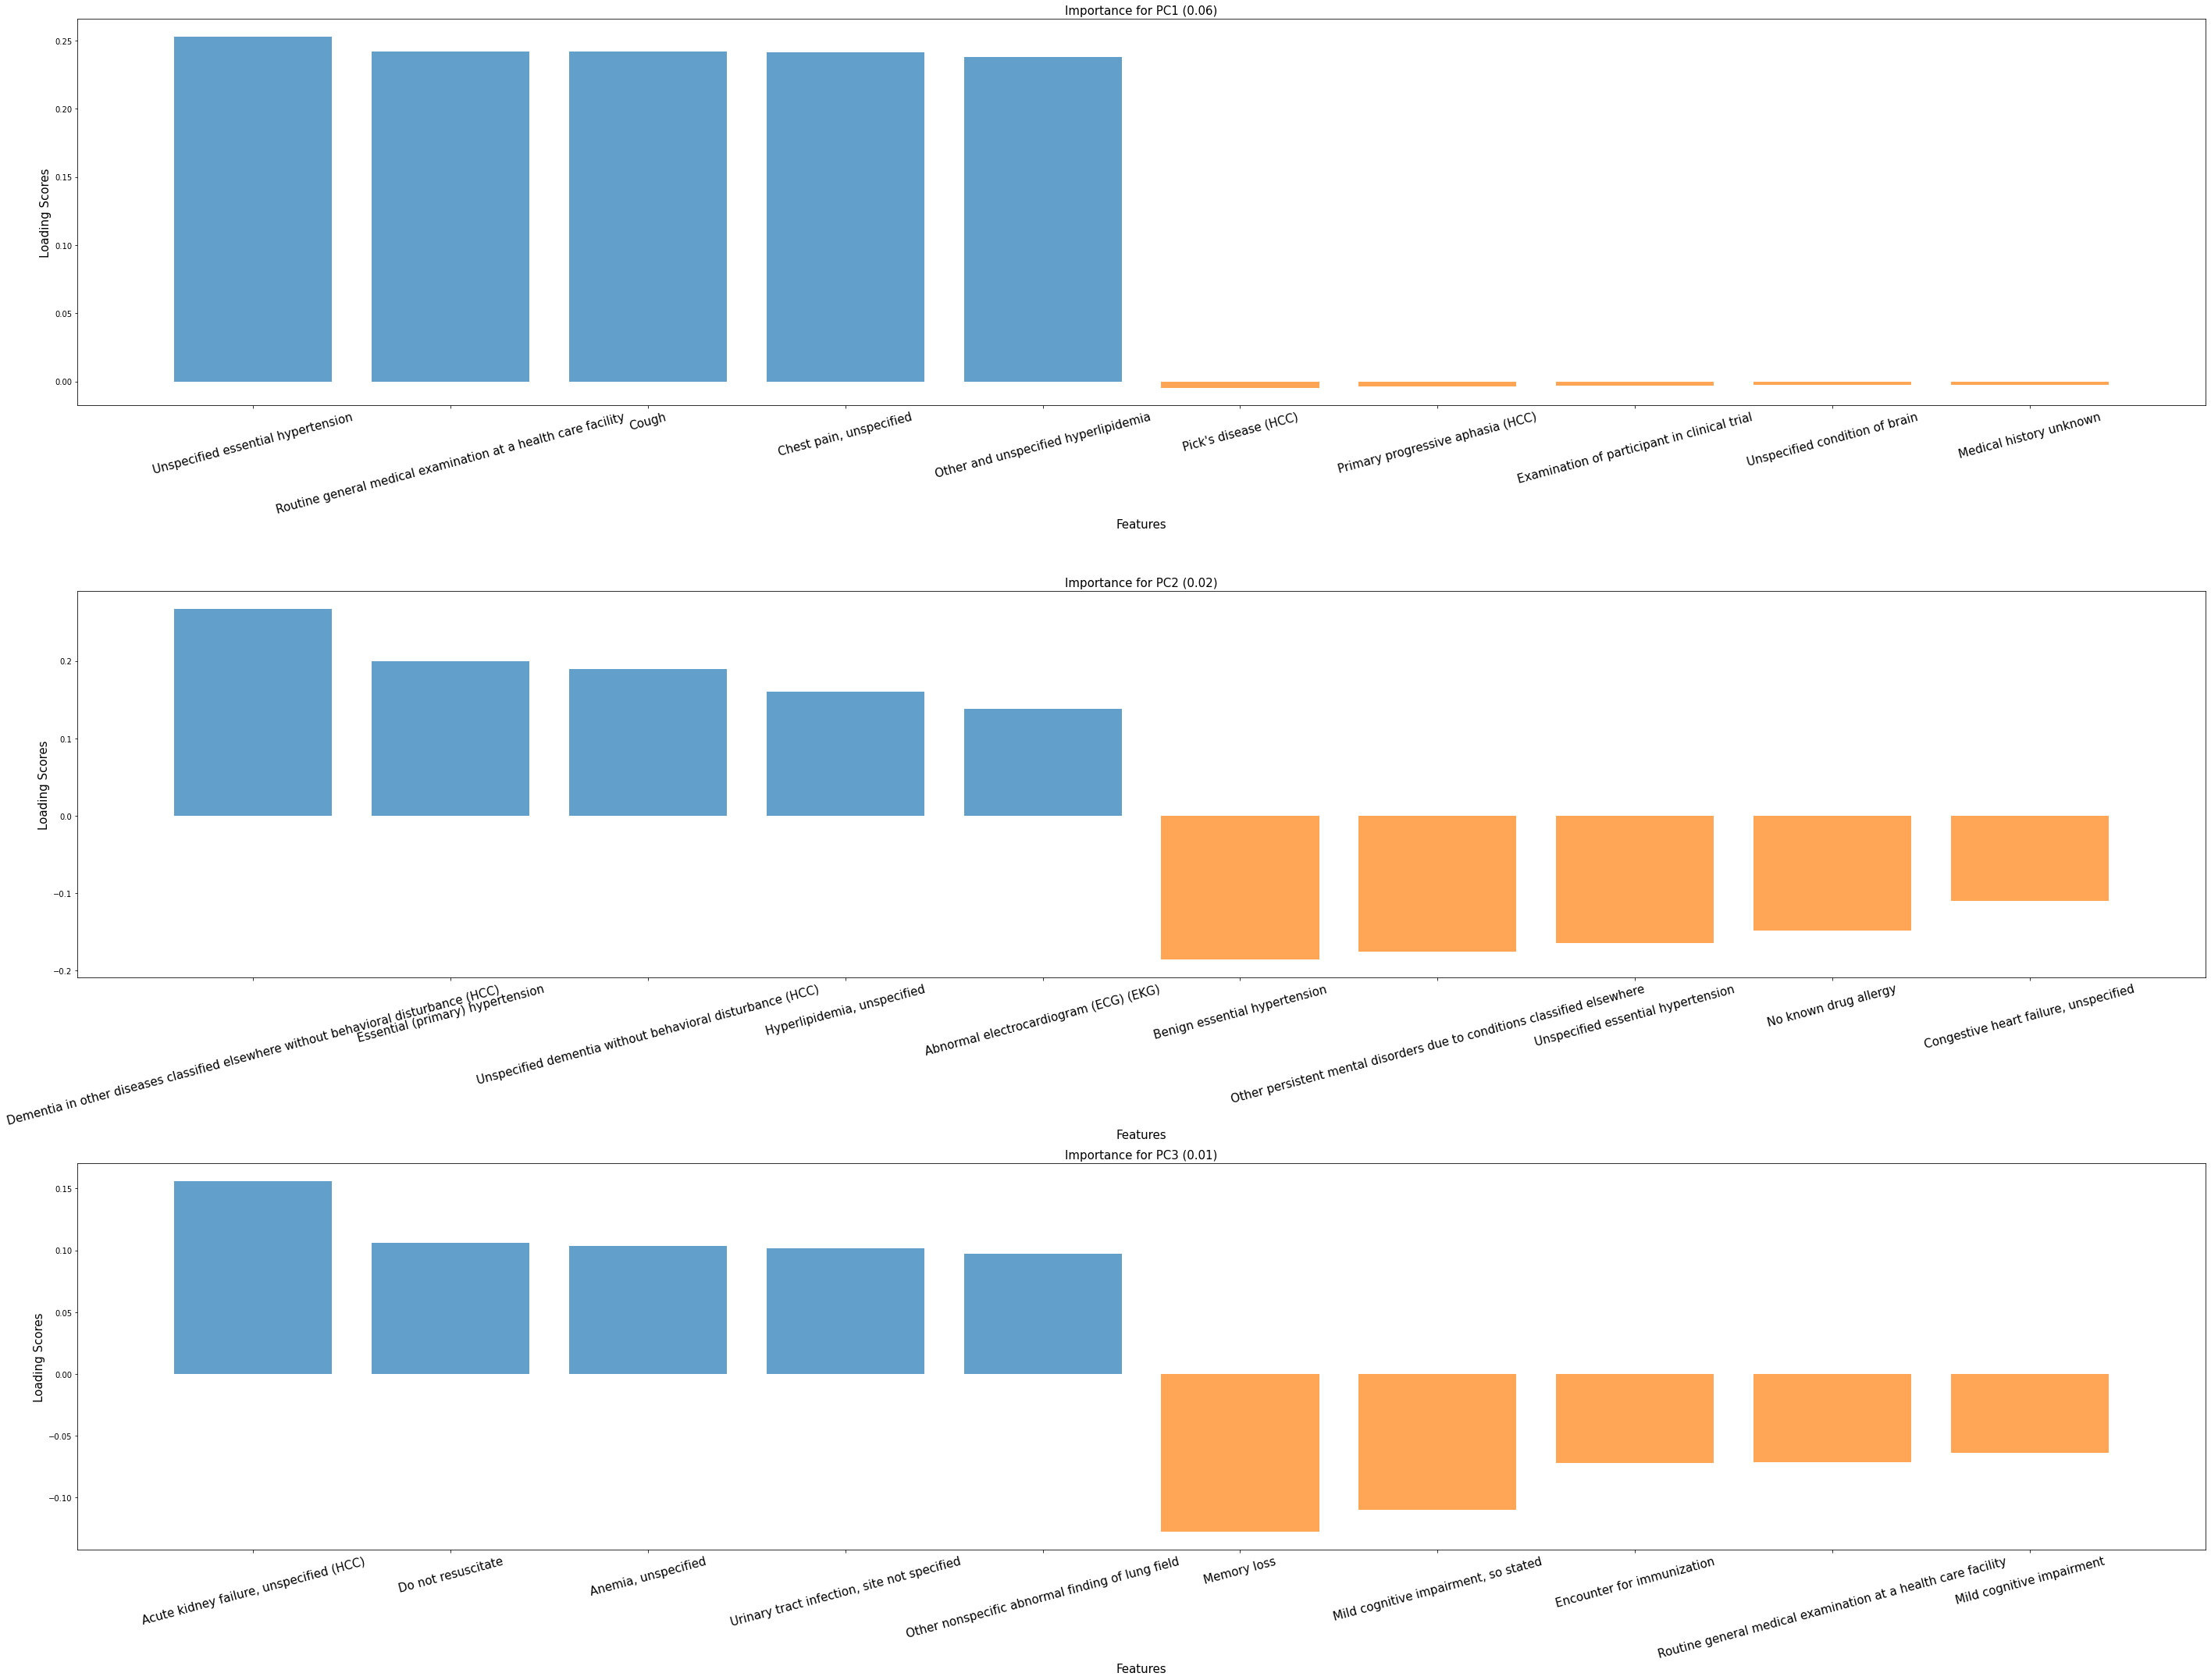

In [10]:
# Plot the 5 highest and the 5 lowest pca loasing
num_components = min(3, loadings_df.shape[1]) # Plot PC1 to PC3

plt.figure(figsize=(40, 10 * num_components))
plt.subplots_adjust(hspace = 2)

for i in range(num_components):
    # Get top 5 loadings
    pc_loadings = loadings_df[f'PC{i+1}']
    top_features = pc_loadings.nlargest(5).index
    top_loadings = pc_loadings[top_features]
    
    bottom_features = pc_loadings.nsmallest(5).index
    bottom_loadings = pc_loadings[bottom_features]
    
    # Get bottom 5 loadings
    plt.subplot(num_components, 1, i + 1)
    plt.bar(top_features, top_loadings, alpha=0.7)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Loading Scores', fontsize=15)
    plt.xticks(fontsize= 15, rotation=15)
    
    plt.subplot(num_components, 1, i + 1)
    plt.bar(bottom_features, bottom_loadings, alpha=0.7)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Loading Scores', fontsize=15)
    plt.title(f'Importance for PC{i+1} ({explained_variance_ratio[i]:.2f})', fontsize=15)
    plt.xticks(fontsize= 15, rotation=15)

plt.tight_layout()
plt.show()